### Imports and environemnt setup

In [70]:
import utils 
import pandas as pd

import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [99]:
from_csv = False
csv_path = 'movies.csv'

### Get data from API or load csv

In [100]:
if from_csv:
    movies_df = pd.read_csv(csv_path)
else:
    movies_dict = utils.get_movies_list(pages=20)
    all_movie_details = []
    for i in range(len(movies_dict)):
        movie_id = movies_dict[i]['id']
        movie_details = utils.get_movie_details(movie_id)
        all_movie_details.append(movie_details)
    movies_df = pd.DataFrame(all_movie_details)
    movies_df = movies_df[['id', 'budget', 'genres', 'popularity', 'revenue', 'title', 'release_date', 'runtime', 'vote_average']]


In [101]:
movies_df

,id,budget,genres,popularity,revenue,title,release_date,runtime,vote_average
0,19995,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",166.915,2923706026,Avatar,2009-12-15,162,7.576
1,299534,356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",130.074,2800000000,Avengers: Endgame,2019-04-24,181,8.261
2,76600,460000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",379.955,2320250281,Avatar: The Way of Water,2022-12-14,192,7.651
3,597,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",164.274,2264162353,Titanic,1997-11-18,194,7.901
4,140607,245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",102.188,2068223624,Star Wars: The Force Awakens,2015-12-15,136,7.289
...,...,...,...,...,...,...,...,...,...
395,534,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",57.034,371353001,Terminator Salvation,2009-05-20,115,6.048
396,1771,140000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",55.444,370569774,Captain America: The First Avenger,2011-07-22,124,6.997
397,137113,178000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",62.139,370541256,Edge of Tomorrow,2014-05-27,114,7.610
398,544,23000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",40.081,369884651,There's Something About Mary,1998-07-15,119,6.590


In [102]:
if not from_csv:
    movies_df.to_csv('movies2.csv', index=False)

### Training a basic model

In [103]:
model = KNeighborsRegressor(n_neighbors= 10)
model = RadiusNeighborsRegressor(radius= 10)
movies_df = movies_df.dropna()
X = movies_df[['budget']]

y = movies_df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = model.fit(X_train, y_train)

# Evaluate on training set
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Training set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))


# Evaluate on test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))


Training set scores: mse 43499810659051224.000000, mae 139349494.290512, r2 0.610875
Test set scores: mse 10633823967902210726366955886736310272.000000, mae 1152921504911683584.000000, r2 -71570737453149544448.000000


c:\Users\Iga\anaconda3\envs\id2223\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Users\Iga\anaconda3\envs\id2223\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


c:\Users\Iga\anaconda3\envs\id2223\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Users\Iga\anaconda3\envs\id2223\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


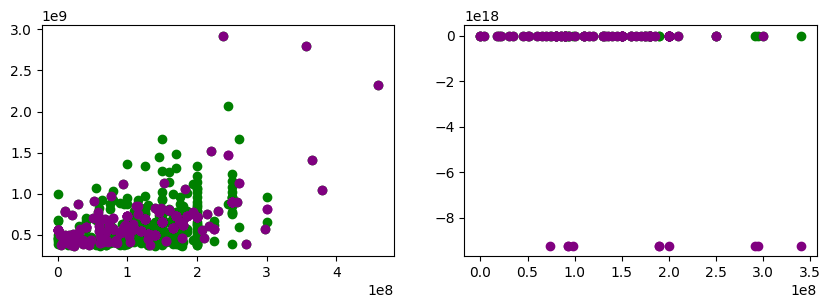

In [104]:
f, ax = plt.subplots(1, 2,figsize=(10, 3))
ax[0].scatter(X_train, y_train, color='green')
ax[0].scatter(X_train, reg.predict(X_train), color='purple')
ax[1].scatter(X_test, y_test, color='green')
ax[1].scatter(X_test, reg.predict(X_test), color='purple')

plt.show()

# plt.scatter(X_train, y_train, color='green')
# plt.scatter(X_train, reg.predict(X_train), color='purple')